# Decision Tree Implementation

# PART A

In [1]:
#Import necessary libraries to smoothly carry out the operations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import *

In [2]:
#Read data from local storage
P2_Data = pd.read_csv('P2\CE802_P2_Data.csv', dayfirst=True)
Data=P2_Data.copy()

In [3]:
# View the data for better understanding
Data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000
mean,-28749.730710,1.259000,-5.008527,-7.073618,1787.391510,0.507000,4.314597,16794.708266,0.481000,-10014.212102,...,39.155125,-13.932299,6.097217,15.932875,4.033075,9994.592611,-3750.649178,3.255798,-5066.909169,-10.183520
std,1688.229804,0.499408,1.343875,2.708288,702.890861,0.500201,0.614178,2074.355688,0.499889,1494.941683,...,14.584924,10.285697,1.802407,2.708330,2.609035,1058.036210,739.616151,2.699756,1023.164795,1.062748
min,-81470.290000,0.730000,-15.676000,-17.676000,-1942.650000,0.000000,3.540592,7679.980000,0.000000,-19975.820000,...,-18.360000,-85.560000,4.225980,12.966360,1.266660,3700.240000,-8521.050000,0.334140,-12915.220000,-13.620000
25%,-28720.400000,0.730000,-5.319050,-8.262750,1506.272500,0.000000,3.827700,15994.420000,0.000000,-10175.920000,...,29.930250,-16.732500,4.743650,13.852350,2.079975,9584.540000,-3791.062500,1.150725,-5335.020000,-10.925000
50%,-28701.070500,1.730000,-4.507200,-6.221100,1649.040000,1.000000,4.180750,16381.580000,0.000000,-9636.920000,...,39.270150,-10.862000,5.534500,15.096750,3.267150,9755.930000,-3589.140000,2.384400,-5044.997000,-10.135000
75%,-28682.255000,1.730000,-4.127370,-5.059425,1880.725000,1.000000,4.694500,17021.730000,1.000000,-9383.513500,...,48.359250,-6.972000,6.834000,17.170500,5.188500,10066.240000,-3489.926250,4.704750,-4795.820000,-9.450000
max,-24983.290000,1.730000,-4.040002,-4.206600,6602.350000,1.000000,7.081000,32339.980000,1.000000,-1929.820000,...,86.280000,-3.782328,13.330000,26.424000,14.805000,21124.240000,1171.950000,13.536000,1892.780000,-6.810000


In [4]:
# Visualise the data
#sns.pairplot(Data,hue='Class',size=2.5)

In [5]:
# Detailed study on data types
Data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6         int64
F7       float64
F8       float64
F9         int64
F10      float64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
F16      float64
F17      float64
F18      float64
F19      float64
F20      float64
F21      float64
Class       bool
dtype: object

In [6]:
# Study the data and strucure to proceed further
Data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.7350,5.9854,14.24730,1.4892,9959.04,-3199.350,6.8670,-4850.820,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.1710,4.6222,14.99820,3.1206,10107.44,-3064.950,9.4710,378.780,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.6500,4.4096,17.79000,1.9818,10971.04,-3638.850,2.0373,-5215.480,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.6390,8.5080,12.98424,11.5620,9681.10,724.950,2.0220,-4378.420,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.7300,5.5188,13.57260,2.5440,10965.64,-2607.150,4.3140,-1919.220,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28685.380,0.73,-4.095060,-15.54300,1654.77,1,4.09930,16381.38,0,-9861.820,...,-19.3800,6.4440,13.15350,3.2538,10170.64,-3932.850,1.4196,-5053.546,-10.75,False
996,-28668.770,1.73,-4.050914,-9.18600,1457.85,0,4.36770,16036.38,0,-9418.336,...,-31.7600,4.7966,14.72040,13.4190,9607.28,-3421.860,1.6728,-4964.700,-10.35,False
997,-28667.610,1.73,-4.887000,-11.41200,1515.96,0,5.01500,16097.92,1,-10209.620,...,-19.6400,6.4060,13.55100,2.1246,10907.64,-2875.950,2.6988,-4965.880,-11.01,True
998,-28750.050,0.73,-5.490800,-5.07480,2249.25,0,3.88900,16120.46,1,-9358.160,...,-6.4210,4.5810,16.77000,4.0221,9815.54,-3513.039,6.1860,-4261.020,NaN,False


<AxesSubplot:>

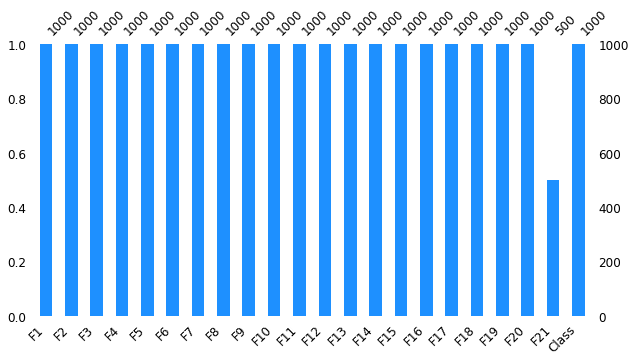

In [7]:
# Visualising data to understand the missing values
import missingno as msno
%matplotlib inline
#msno.heatmap(Data)
msno.bar(Data, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [8]:
#Replacing True and False with 0's and 1's for categorical value conversion through label encoding
Data.Class = Data.Class.replace({True: 1, False: 0})
Data.isnull().sum()
Data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,500.000000,1000.000000
mean,-28749.730710,1.259000,-5.008527,-7.073618,1787.391510,0.507000,4.314597,16794.708266,0.481000,-10014.212102,...,-13.932299,6.097217,15.932875,4.033075,9994.592611,-3750.649178,3.255798,-5066.909169,-10.183520,0.506000
std,1688.229804,0.499408,1.343875,2.708288,702.890861,0.500201,0.614178,2074.355688,0.499889,1494.941683,...,10.285697,1.802407,2.708330,2.609035,1058.036210,739.616151,2.699756,1023.164795,1.062748,0.500214
min,-81470.290000,0.730000,-15.676000,-17.676000,-1942.650000,0.000000,3.540592,7679.980000,0.000000,-19975.820000,...,-85.560000,4.225980,12.966360,1.266660,3700.240000,-8521.050000,0.334140,-12915.220000,-13.620000,0.000000
25%,-28720.400000,0.730000,-5.319050,-8.262750,1506.272500,0.000000,3.827700,15994.420000,0.000000,-10175.920000,...,-16.732500,4.743650,13.852350,2.079975,9584.540000,-3791.062500,1.150725,-5335.020000,-10.925000,0.000000
50%,-28701.070500,1.730000,-4.507200,-6.221100,1649.040000,1.000000,4.180750,16381.580000,0.000000,-9636.920000,...,-10.862000,5.534500,15.096750,3.267150,9755.930000,-3589.140000,2.384400,-5044.997000,-10.135000,1.000000
75%,-28682.255000,1.730000,-4.127370,-5.059425,1880.725000,1.000000,4.694500,17021.730000,1.000000,-9383.513500,...,-6.972000,6.834000,17.170500,5.188500,10066.240000,-3489.926250,4.704750,-4795.820000,-9.450000,1.000000
max,-24983.290000,1.730000,-4.040002,-4.206600,6602.350000,1.000000,7.081000,32339.980000,1.000000,-1929.820000,...,-3.782328,13.330000,26.424000,14.805000,21124.240000,1171.950000,13.536000,1892.780000,-6.810000,1.000000


In [9]:
# Make a copy of data
Data_Mean=Data.copy()

In [10]:
#Imputing missing values using mean value imputation
Data_Mean['F21'].fillna(Data_Mean['F21'].mean(),inplace=True)

In [11]:
Data_Mean

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.7350,5.9854,14.24730,1.4892,9959.04,-3199.350,6.8670,-4850.820,-10.18352,0
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.1710,4.6222,14.99820,3.1206,10107.44,-3064.950,9.4710,378.780,-10.18352,1
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.6500,4.4096,17.79000,1.9818,10971.04,-3638.850,2.0373,-5215.480,-10.18352,0
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.6390,8.5080,12.98424,11.5620,9681.10,724.950,2.0220,-4378.420,-10.18352,0
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.7300,5.5188,13.57260,2.5440,10965.64,-2607.150,4.3140,-1919.220,-10.18352,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28685.380,0.73,-4.095060,-15.54300,1654.77,1,4.09930,16381.38,0,-9861.820,...,-19.3800,6.4440,13.15350,3.2538,10170.64,-3932.850,1.4196,-5053.546,-10.75000,0
996,-28668.770,1.73,-4.050914,-9.18600,1457.85,0,4.36770,16036.38,0,-9418.336,...,-31.7600,4.7966,14.72040,13.4190,9607.28,-3421.860,1.6728,-4964.700,-10.35000,0
997,-28667.610,1.73,-4.887000,-11.41200,1515.96,0,5.01500,16097.92,1,-10209.620,...,-19.6400,6.4060,13.55100,2.1246,10907.64,-2875.950,2.6988,-4965.880,-11.01000,1
998,-28750.050,0.73,-5.490800,-5.07480,2249.25,0,3.88900,16120.46,1,-9358.160,...,-6.4210,4.5810,16.77000,4.0221,9815.54,-3513.039,6.1860,-4261.020,-10.18352,0


In [12]:
#extracting dependent and independet features separately for testing and training the data
features_mean = Data_Mean.drop('Class', axis=1)
predictor_mean = Data_Mean['Class']

In [13]:
# Feature Scaling and Transformation in the dataset 
from sklearn.preprocessing import StandardScaler
sc_mean = StandardScaler()
sc_mean.fit(features_mean)
fitted_features = sc_mean.fit_transform(features_mean)
Data_Mean = pd.DataFrame(features_mean,columns=Data_Mean.columns[:-1])

In [14]:
#Splitting data into train and test for Mean Value imputation

from sklearn.model_selection import train_test_split

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(fitted_features, predictor_mean, test_size = 0.33, random_state = 42)

In [15]:
# Building the model with decision tree classifier

from sklearn.tree import DecisionTreeClassifier
clf_gini_mean = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=4)

# fitting the builded model the model
clf_gini_mean.fit(X_train_mean, y_train_mean)

DecisionTreeClassifier(max_depth=4, random_state=4)

In [16]:
#Predicting the model with test data
y_pred_test_mean = clf_gini_mean.predict(X_test_mean)
y_pred_train_mean = clf_gini_mean.predict(X_train_mean)

#### Finding Accuracy score using KNN

In [17]:
Data_Knn=Data.copy()

In [18]:
#KNN based imputation
from sklearn.impute import KNNImputer
Knn_imput = KNNImputer(n_neighbors=2)
Data_Knn = pd.DataFrame(Knn_imput.fit_transform(Data_Knn),columns = Data_Knn.columns)
Data_Knn

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0.0,4.40510,16004.16,1.0,-11645.820,...,-13.7350,5.9854,14.24730,1.4892,9959.04,-3199.350,6.8670,-4850.820,-11.005,0.0
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0.0,4.54500,16041.48,1.0,-9759.420,...,-5.1710,4.6222,14.99820,3.1206,10107.44,-3064.950,9.4710,378.780,-9.205,1.0
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0.0,3.59962,16422.78,0.0,-10775.220,...,-38.6500,4.4096,17.79000,1.9818,10971.04,-3638.850,2.0373,-5215.480,-10.535,0.0
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0.0,3.56675,16270.04,1.0,-9416.714,...,-8.6390,8.5080,12.98424,11.5620,9681.10,724.950,2.0220,-4378.420,-9.790,0.0
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1.0,5.07000,16548.78,1.0,-9797.820,...,-14.7300,5.5188,13.57260,2.5440,10965.64,-2607.150,4.3140,-1919.220,-10.385,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-28685.380,0.73,-4.095060,-15.54300,1654.77,1.0,4.09930,16381.38,0.0,-9861.820,...,-19.3800,6.4440,13.15350,3.2538,10170.64,-3932.850,1.4196,-5053.546,-10.750,0.0
996,-28668.770,1.73,-4.050914,-9.18600,1457.85,0.0,4.36770,16036.38,0.0,-9418.336,...,-31.7600,4.7966,14.72040,13.4190,9607.28,-3421.860,1.6728,-4964.700,-10.350,0.0
997,-28667.610,1.73,-4.887000,-11.41200,1515.96,0.0,5.01500,16097.92,1.0,-10209.620,...,-19.6400,6.4060,13.55100,2.1246,10907.64,-2875.950,2.6988,-4965.880,-11.010,1.0
998,-28750.050,0.73,-5.490800,-5.07480,2249.25,0.0,3.88900,16120.46,1.0,-9358.160,...,-6.4210,4.5810,16.77000,4.0221,9815.54,-3513.039,6.1860,-4261.020,-10.820,0.0


In [19]:
#extracting dependent and independet features separately for testing and training the data
features_Knn = Data_Knn.drop('Class', axis=1)
predictor_Knn = Data_Knn['Class']

In [20]:
# Feature Scaling and Transformation in the data
from sklearn.preprocessing import StandardScaler
sc_Knn = StandardScaler()
sc_Knn.fit(features_Knn)
features_Knn = sc_Knn.fit_transform(features_Knn)
Data_Knn = pd.DataFrame(features_Knn,columns=Data_Knn.columns[:-1])

In [21]:
#Splitting data into train and test for Knn

from sklearn.model_selection import train_test_split

X_train_Knn, X_test_Knn, y_train_Knn, y_test_Knn = train_test_split(features_Knn, predictor_Knn, test_size = 0.33, random_state = 42)

In [22]:
# Model building in the decision tree classification

from sklearn.tree import DecisionTreeClassifier
clf_gini_Knn = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=8)

# fitting the model
clf_gini_Knn.fit(X_train_Knn, y_train_Knn)

DecisionTreeClassifier(max_depth=3, random_state=8)

In [23]:
#Predicting the model with test and train data 
y_pred_test_Knn = clf_gini_Knn.predict(X_test_Knn)
y_pred_train_Knn = clf_gini_Knn.predict(X_train_Knn)

## KNN Classification

### Mean Value Based KNN Classification

###### Since the data exploration already done, no need to do the same agin, hence directly applying the algorithm in the KNN based classification method.

In [24]:
Data=P2_Data.copy()

In [25]:
#Replacing True and False with 0's and 1's for categorical value conversion through label encoding
Data.Class = Data.Class.replace({True: 1, False: 0})
Mean_Data=Data.copy()
Knn_Data=Data.copy()

In [26]:
#Imputing missing values using mean value imputation
Mean_Data['F21'].fillna(Mean_Data['F21'].mean(),inplace=True)

In [27]:
#extracting dependent and independet features separately for testing and training the data
mean_features = Mean_Data.drop('Class', axis=1)
mean_predictor = Mean_Data['Class']

In [28]:
# Feature Scaling and Transformation in the data
from sklearn.preprocessing import StandardScaler
meanSC = StandardScaler()
meanSC.fit(features_mean)
fitted_features = meanSC.fit_transform(features_mean)
Mean_Data = pd.DataFrame(fitted_features,columns=Mean_Data.columns[:-1])

In [29]:
#Splitting data into train and test for Knn
from sklearn.model_selection import train_test_split
X_train_Mean, X_test_Mean, y_train_Mean, y_test_Mean = train_test_split(fitted_features, mean_predictor, test_size = 0.33, random_state = 42)

In [30]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf_Mean = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf_Mean.fit(X_train_Mean, y_train_Mean)

KNeighborsClassifier()

In [31]:
#Predicting the model with test and train data
y_pred_test_Mean = clf_Mean.predict(X_test_Mean)
y_pred_train_Mean = clf_Mean.predict(X_train_Mean)

### KNN Based Imputation

In [32]:
#KNN based imputation
from sklearn.impute import KNNImputer
Knnimputer = KNNImputer(n_neighbors=5)
Knn_Data = pd.DataFrame(Knnimputer.fit_transform(Knn_Data),columns = Knn_Data.columns)

In [33]:
#extracting dependent and independet features separately for testing and training the data
Knn_features = Knn_Data.drop('Class', axis=1)
Knn_predictor = Knn_Data['Class']

In [34]:
# Feature Scaling and Transformation in the data
from sklearn.preprocessing import StandardScaler
KnnSC = StandardScaler()
KnnSC.fit(Knn_features)
fittedKnn_features = meanSC.fit_transform(Knn_features)
Knn_Data = pd.DataFrame(fittedKnn_features,columns=Knn_Data.columns[:-1])

In [35]:
#Splitting data into train and test for Knn
from sklearn.model_selection import train_test_split
X_train_Knn, X_test_Knn, y_train_Knn, y_test_Knn = train_test_split(fittedKnn_features, Knn_predictor, test_size = 0.33, random_state = 18)

In [36]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf_Knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf_Knn.fit(X_train_Knn, y_train_Knn)

KNeighborsClassifier()

In [37]:
#Predicting the model with test and train data
y_pred_test_Knn = clf_Knn.predict(X_test_Knn)
y_pred_train_Knn = clf_Knn.predict(X_train_Knn)

In [38]:
# Confusion Matrix evaluation 
from sklearn.metrics import confusion_matrix
cm_mean = confusion_matrix(y_test_mean, y_pred_test_mean)
print('Confusion matrix\n\n', cm_mean)

Confusion matrix

 [[147  18]
 [ 47 118]]


## SVM Classification

### Mean Value Imputation

###### Since the data exploration already done, no need to do the same agin, hence directly applying the algorithm in the SVM based classification method.

In [39]:
SVM_Data=Data.copy()

In [40]:
#Imputing missing values using mean value imputation
SVM_Data['F21'].fillna(SVM_Data['F21'].mean(),inplace=True)

In [41]:
#extracting dependent and independet features separately for testing and training the data
meanSVM_features = SVM_Data.drop('Class', axis=1)
meanSVM_predictor = SVM_Data['Class']

In [42]:
# Feature Scaling and Transformation in data
from sklearn.preprocessing import StandardScaler
meanSVMSC = StandardScaler()
meanSVMSC.fit(meanSVM_features)
fitted_featuresSVM = meanSVMSC.fit_transform(meanSVM_features)
SVM_Data = pd.DataFrame(fitted_featuresSVM,columns=SVM_Data.columns[:-1])

In [43]:
#Splitting data into train and test 
from sklearn.model_selection import train_test_split
X_train_MeanSVM, X_test_MeanSVM, y_train_MeanSVM, y_test_MeanSVM = train_test_split(fitted_featuresSVM, meanSVM_predictor, test_size = 0.33, random_state = 32)

In [44]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
SVCMeanClf = SVC(kernel='rbf', random_state = 1)
SVCMeanClf.fit(X_train_MeanSVM,y_train_MeanSVM)

SVC(random_state=1)

In [45]:
#Predicting the model with test data
y_pred_test_MeanSVM = clf_Mean.predict(X_test_MeanSVM)
y_pred_train_MeanSVM = clf_Mean.predict(X_train_MeanSVM)

### KNN Based Imputation

In [46]:
SVMKnn_Data=Data.copy()

In [47]:
# KNN based imputation in the dataset
from sklearn.impute import KNNImputer
Knnimputer = KNNImputer(n_neighbors=5)
SVMKnn_Data = pd.DataFrame(Knnimputer.fit_transform(SVMKnn_Data),columns = SVMKnn_Data.columns)

In [48]:
#extracting dependent and independet features separately for testing and training the data
KnnSVM_features = SVMKnn_Data.drop('Class', axis=1)
KnnSVM_predictor = SVMKnn_Data['Class']

In [49]:
# Feature Scaling and Transformation in the data
from sklearn.preprocessing import StandardScaler
SVMSC = StandardScaler()
SVMSC.fit(KnnSVM_features)
fittedKnnSVM_features = SVMSC.fit_transform(Knn_features)
SVMKnn_Data = pd.DataFrame(fittedKnnSVM_features,columns=SVMKnn_Data.columns[:-1])

In [50]:
#Splitting data into train and test for SVM
from sklearn.model_selection import train_test_split
X_train_KnnSVM, X_test_KnnSVM, y_train_KnnSVM, y_test_KnnSVM = train_test_split(fittedKnnSVM_features, KnnSVM_predictor, test_size = 0.33, random_state = 18)

In [51]:
# Fitting SVM to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf_KnnSVC = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf_KnnSVC.fit(X_train_KnnSVM, y_train_KnnSVM)

KNeighborsClassifier()

In [52]:
#Predicting the model with test and train data
y_pred_test_KnnSVC = clf_Knn.predict(X_test_KnnSVM)
y_pred_train_KnnSVC = clf_Knn.predict(X_train_KnnSVM)

## Accuracy Score Calculation for Decision Tree

###### Performance evaluation is done through different approaches

#### Using Mean Value Imputation

In [53]:
#Accuracy Score for Decision Tree

from sklearn.metrics import accuracy_score
Tree_Test_Accuracy='{:.2%}'.format(accuracy_score(y_test_mean, y_pred_test_mean))
Tree_Train_Accuracy='{:.2%}'.format(accuracy_score(y_train_mean, y_pred_train_mean))
print('Test set accuracy score (Mean Value Imputation):', Tree_Test_Accuracy)
print('Training-set accuracy score (Mean Value Imputation):',Tree_Train_Accuracy )

Test set accuracy score (Mean Value Imputation): 80.30%
Training-set accuracy score (Mean Value Imputation): 85.07%


#### Using KNN Based Imputation

In [54]:
#Accuracy Score for 

from sklearn.metrics import accuracy_score
KNN_Tree_Test_Accuracy='{:.2%}'.format(accuracy_score(y_test_Knn, y_pred_test_Knn))
KNN_Tree_Train_Accuracy='{:.2%}'.format(accuracy_score(y_train_Knn, y_pred_train_Knn))
print('Test set accuracy score (KNN Imputation):', KNN_Tree_Test_Accuracy )
print('Training-set accuracy score (KNN Imputation):', KNN_Tree_Train_Accuracy)

Test set accuracy score (KNN Imputation): 65.15%
Training-set accuracy score (KNN Imputation): 79.10%


## Accuracy Score Calculation for K Nearest Neighbour

#### Using Mean Value Imputation

In [55]:
#y_test_Mean is the true class labels and y_pred_test_Mean are the predicted class labels in the test-set.

from sklearn.metrics import accuracy_score
KNN_Test_Accuracy='{:.2%}'.format(accuracy_score(y_test_Mean, y_pred_test_Mean))
KNN_Train_Accuracy='{:.2%}'.format(accuracy_score(y_train_Mean, y_pred_train_Mean))
print('Test set accuracy score(Mean Value Imputation):',KNN_Test_Accuracy )
print('Training-set accuracy score (Mean Value Imputation):',KNN_Train_Accuracy)

Test set accuracy score(Mean Value Imputation): 62.73%
Training-set accuracy score (Mean Value Imputation): 78.06%


#### Using KNN based Imputation

In [56]:
#y_test_Knn is the true class labels and y_pred_test_Knn are the predicted class labels in the test-set.

from sklearn.metrics import accuracy_score
KNN_KNN_Test_Accuracy='{:.2%}'.format(accuracy_score(y_test_Knn, y_pred_test_Knn))
KNN_KNN_Train_Accuracy='{:.2%}'.format(accuracy_score(y_train_Knn, y_pred_train_Knn))
print('Test set accuracy score: (KNN Imputation)',KNN_KNN_Test_Accuracy )
print('Training-set accuracy score:(KNN Imputation):', KNN_KNN_Train_Accuracy )

Test set accuracy score: (KNN Imputation) 65.15%
Training-set accuracy score:(KNN Imputation): 79.10%


## Accuracy Score Calculation for SVM

#### Using Mean Value Imputation

In [57]:
#y_test_MeanSVM is the true class labels and y_pred_test_MeanSVM are the predicted class labels in the test-set.

from sklearn.metrics import accuracy_score
SVM_Test_Accuracy='{:.2%}'.format(accuracy_score(y_test_MeanSVM, y_pred_test_MeanSVM))
SVM_Train_Accuracy='{:.2%}'.format(accuracy_score(y_train_MeanSVM, y_pred_train_MeanSVM))
print('Test set accuracy score (SVM Mean Value Imputation):', SVM_Test_Accuracy )
print('Training-set accuracy score (SVM Mean Value Imputation):', SVM_Train_Accuracy )

Test set accuracy score (SVM Mean Value Imputation): 73.03%
Training-set accuracy score (SVM Mean Value Imputation): 72.99%


#### Using KNN based Imputation

In [58]:
#y_test_KnnSVM is the true class labels and y_pred_test_KnnSVC are the predicted class labels in the test-set.

from sklearn.metrics import accuracy_score
SVM_KNN_Test_Accuracy='{:.2%}'.format(accuracy_score(y_test_KnnSVM, y_pred_test_KnnSVC))
SVM_KNN_Train_Accuracy='{:.2%}'.format(accuracy_score(y_train_KnnSVM, y_pred_train_KnnSVC))
print('Test set accuracy score (SVM KNN Imputation):', SVM_KNN_Test_Accuracy )
print('Training-set accuracy score:(SVM KNN Imputation):', SVM_KNN_Train_Accuracy )

Test set accuracy score (SVM KNN Imputation): 65.15%
Training-set accuracy score:(SVM KNN Imputation): 79.10%


In [59]:
#Classifiction Report

from sklearn.metrics import classification_report
print(classification_report(y_test_mean, y_pred_test_mean))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       165
           1       0.87      0.72      0.78       165

    accuracy                           0.80       330
   macro avg       0.81      0.80      0.80       330
weighted avg       0.81      0.80      0.80       330



In [60]:
# Confusion Matrix evaluation for decision tree

from sklearn.metrics import confusion_matrix

cm_mean = confusion_matrix(y_test_mean, y_pred_test_mean)

print('Confusion matrix\n\n', cm_mean)

Confusion matrix

 [[147  18]
 [ 47 118]]


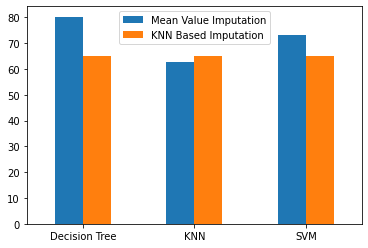

In [61]:
#COmparison of different imputation methods
Mean = [80.30,62.73,73.03]
Knn = [65.15,65.15,65.15]
index = ['Decision Tree', 'KNN', 'SVM']
df = pd.DataFrame({'Mean Value Imputation': Mean,
                   'KNN Based Imputation': Knn}, index=index)
ax = df.plot.bar(rot=0)

# PART B

In [62]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('P2\CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

#Imputing the missing values using mean value imputation
test_data['F21'].fillna(test_data['F21'].mean(),inplace=True)

#Scaling and data transformation
test_data=sc_mean.transform(test_data)

#Predicting the dependent variable
predicted = clf_gini_mean.predict(test_data)

# Replace the last (empty) column with your prediction in the orginal data frame
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('P2\CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])